# Dataset para detecção de fake news

Junção de datasets de notícias falsas e reais em português para posteriormente, rodar algoritmos que sejam capazes de realizar a detecção de fake news. Nesse processo os datasets FakeRecogna e Fake.br Corpus foram padronizados e concatenados em um dataset final no formato csv, contendo 19.102 notícias com equilíbrio entre as classes verdadeira e falsa.

Foram seguidas as seguintes etapas:
1. Carregar dataset
2. Remover stopwords, acentos e pontuação indesejada
3. Adequar dados a um dataframe com colunas "Noticia" e "Classe"
4. Armazenar dados no dataset final

Base de notícias disponíveis em:

https://repositorio.unesp.br/items/dbd004a4-bdb8-4cc7-86b8-cec7e7159979

https://github.com/roneysco/Fake.br-Corpus



----



# Preparação de ambiente

In [26]:
!pip install unidecode
!pip install openpyxl
!pip install nltk

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import unidecode
import nltk

from unidecode import unidecode

In [28]:
# Incorporação das stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_br = stopwords.words('portuguese')

# Exemplo de stopwords
print(stopwords_br)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
"""Realiza a limpeza do texto removendo acentos, pontuação e stopwords."""
def limpar_texto(texto):
    if not isinstance(texto, str):
        return ""
    texto = unidecode(texto)
    texto = re.sub(r"[^\w\s]", "", texto)
    texto = " ".join(word for word in texto.split() if word.lower() not in stopwords_br)
    return texto

"""Aplica a limpeza na coluna de texto de um dataframe e remove NaNs da coluna de rótulos."""
def preprocessar_dataframe(df, coluna_texto="Noticia", coluna_rotulo="Classe"):
    # Limpeza de texto
    df[coluna_texto] = df[coluna_texto].fillna("").astype(str)
    df[coluna_texto] = df[coluna_texto].apply(limpar_texto)

    # Remover linhas onde o rótulo ou o texto é NaN
    df = df.dropna(subset=[coluna_rotulo, coluna_texto])

    return df

# Pré-processamento Dataset 1

In [30]:
# Carregando primeiro dataset
df_sem_tratamento = pd.read_excel("/content/FakeRecogna.xlsx")
dataframe1 = preprocessar_dataframe(df_sem_tratamento, coluna_texto="Noticia", coluna_rotulo="Classe")

dataframe1.head()

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nPapa Francisco foi preso sob acusação de t...,Boato – Ocorreu um apagão no Vaticano. O papa ...,apagao vaticano papar presar acusacao trafico ...,entretenimento,11/01/2021,\nEdgard Matsuki,https://www.boatos.org/religiao/papa-francisco...,0.0
1,Equador prepara cova coletiva para mortos por ...,NaN,governar equador anunciar preparar cova coleti...,saúde,27/03/2020 18h25,27/03/2020 18h25,https://noticias.uol.com.br/internacional/ulti...,1.0
2,Air France voltará a operar voo direto Pequim-...,NaN,companhia air france operar voar direto pequim...,saúde,07/08/2020 13h42,07/08/2020 13h42,https://www.uol.com.br/nossa/noticias/afp/2020...,1.0
3,Marfrig intensifica venda de carne do Brasil a...,NaN,marfrig global foods retomar vender carnar bov...,saúde,27/04/2020 14h53,27/04/2020 14h53,https://economia.uol.com.br/noticias/reuters/2...,1.0
4,As parciais das eleições de 2014 alternaram ma...,NaN,assunto voltar compartilhar rede social julho ...,entretenimento,31/07/2021,Gilmar Lopes,https://www.e-farsas.com/as-parciais-das-eleic...,0.0


In [31]:
dataframe1['Categoria'].value_counts()

,count
Categoria,
saúde,4456
política,3951
entretenimento,1409
brasil,904
ciência,602
mundo,580


In [32]:
# Incluindo características de interesse no dataframe final
df_final = dataframe1[["Noticia", "Classe"]]

df_final.head()

,Noticia,Classe
0,apagao vaticano papar presar acusacao trafico ...,0.0
1,governar equador anunciar preparar cova coleti...,1.0
2,companhia air france operar voar direto pequim...,1.0
3,marfrig global foods retomar vender carnar bov...,1.0
4,assunto voltar compartilhar rede social julho ...,0.0


# Pré-processamento Dataset 2

O segundo dataset já se encontra livre de stopwords, acentos ou caracteres especiais

In [33]:
# Carregando segundo dataset
dataframe2 = pd.read_csv("/content/pre-processed.csv")

# Formatando dataset 2
dataframe2 = dataframe2.rename(columns={"preprocessed_news": "Noticia", "label": "Classe"})
dataframe2["Classe"] = dataframe2["Classe"].map({"fake": 0, "true": 1}) # Mapear os valores da coluna "Classe"
dataframe2 = dataframe2.drop(columns=["index"], errors="ignore")  # Remove a coluna 'index'

print(dataframe2.head())

   Classe                                            Noticia
0       0  katia abreu diz vai colocar expulsao moldura n...
1       0  ray peita bolsonaro conservador fake entrevist...
2       0  reinaldo azevedo desmascarado policia federal ...
3       0  relatorio assustador bndes mostra dinheiro pub...
4       0  radialista americano fala sobre pt vendem ilus...


In [34]:
# Concatenando DataFrames
df_final = pd.concat([df_final, dataframe2], ignore_index=True)

# Concatenação

,count
Classe,
0.0,9551
1.0,9551


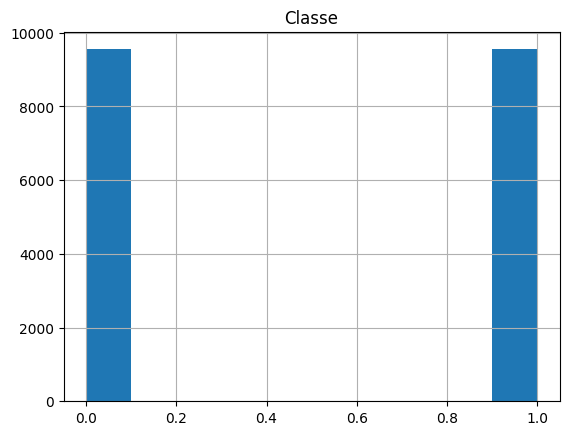

In [35]:
# Vizualizando distribuição das classes de notícias
df_final.hist()
df_final["Classe"].value_counts()

# Nuvem de palavras de Fake News

Classe 0 = Fake news

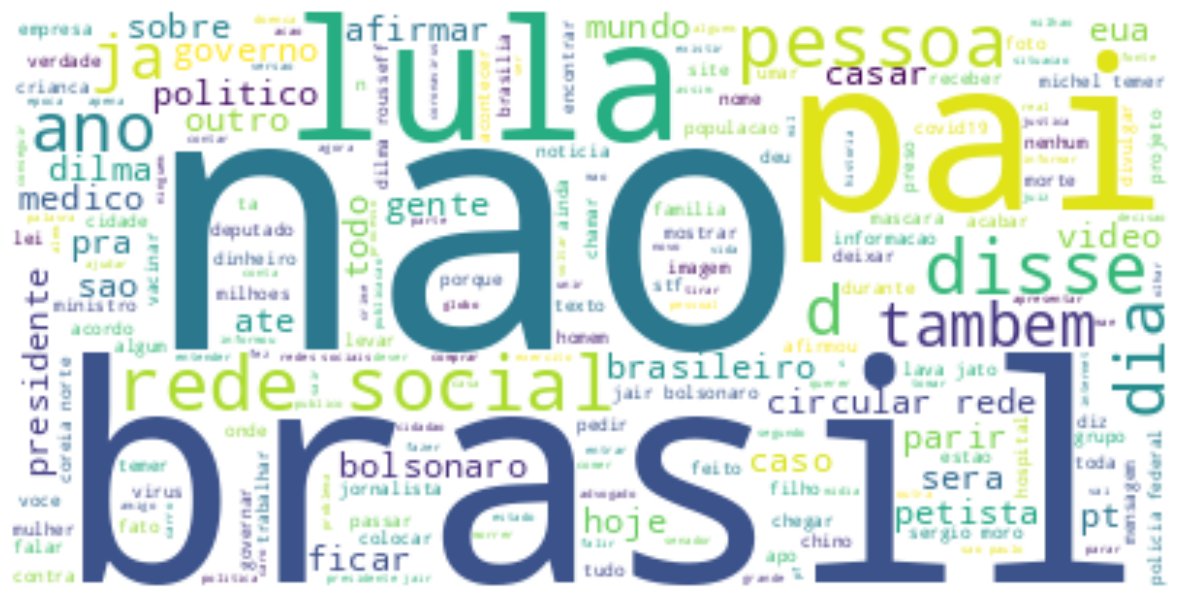

In [36]:
from wordcloud import WordCloud

# Separa noticias falsas
dataframe_fake = df_final[df_final["Classe"] == 0]
noticias_falsas = ' '.join(i for i in dataframe_fake["Noticia"])

# Plotando nuvem de palavras
wordcloud = WordCloud(background_color="white").generate(noticias_falsas)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Nuvem de palavras de notícias verdadeiras

Classe 1 = Notícias verdadeiras

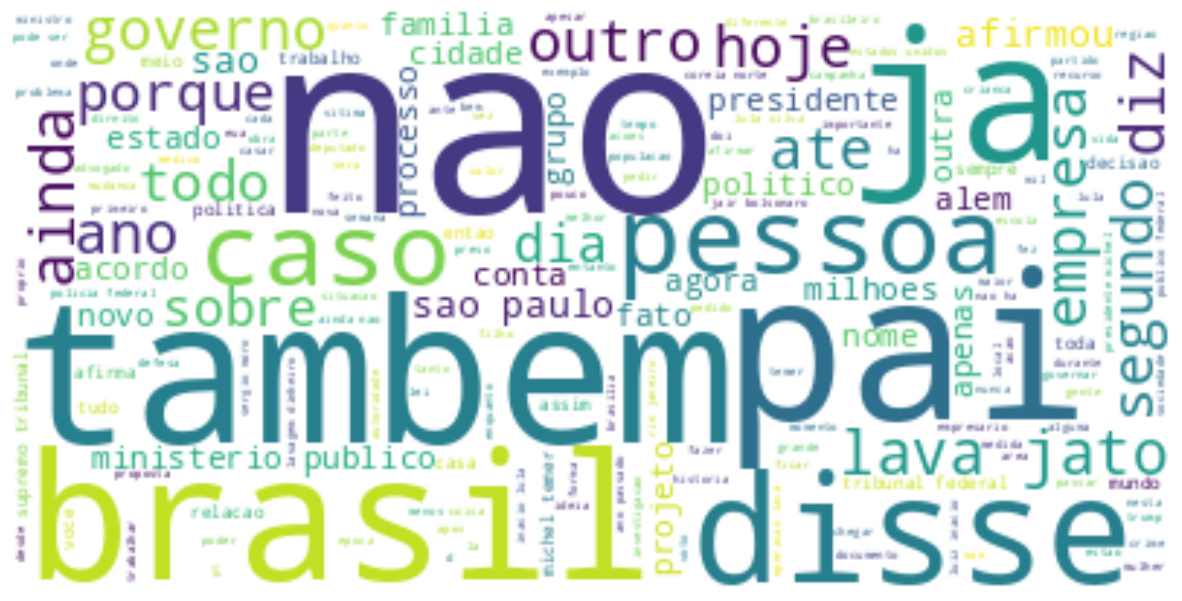

In [37]:
# Separa noticias verdadeiras
dataframe_real = df_final[df_final["Classe"] == 1]
noticias_reais = ''.join(word for word in dataframe_real['Noticia'])

# Plotar nuvem de palavras
wordcloud = WordCloud(background_color="white").generate(noticias_reais)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Criando arquivo csv

In [38]:
# Salvando o DataFrame como um arquivo CSV
df_final.to_csv('df_final.csv', index=False)

from google.colab import files
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>